In [51]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where to import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [52]:
# This option ensures the graphs created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [53]:
# Import datasets
path=r'/Users/elvachen/Documents/DA Learning/Immersion-Exercise/6/2original data'
df_merged=pd.read_csv(os.path.join(path,'merged_by_year.csv'),index_col = False)

In [54]:
df_merged.head()

,Unnamed: 0,year,county,zev_pop,non_zev_pop,zev_sales,gasoline_price,diesel_price,population
0,0,2010,Alameda,20.0,885402.0,13,3.090846,3.157423,1512986
1,1,2010,Amador,1.0,30480.0,1,3.090846,3.157423,37886
2,2,2010,Contra Costa,10.0,666294.0,9,3.090846,3.157423,1052540
3,3,2010,Fresno,2.0,481145.0,2,3.090846,3.157423,932039
4,4,2010,Humboldt,2.0,90949.0,1,3.090846,3.157423,135009


In [55]:
# Drop column "county" which is not numeric
df_merged= df_merged.drop(columns = ['county'])

In [56]:
# Lower the granularity of the column "population"
df_merged['population']=df_merged['population']/1000

In [57]:
# Lower the granularity of the column "non_zev_pop"
df_merged['non_zev_pop']=df_merged['non_zev_pop']/1000

### The elbow technique

In [58]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [59]:
score = [kmeans[i].fit(df_merged).score(df_merged) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-199661623292.5558,
 -64452296243.3334,
 -31308901836.598198,
 -17142395030.581625,
 -12052194078.716099,
 -8233485967.338818,
 -6272524208.15208,
 -4720985981.366151,
 -3879234622.191063]

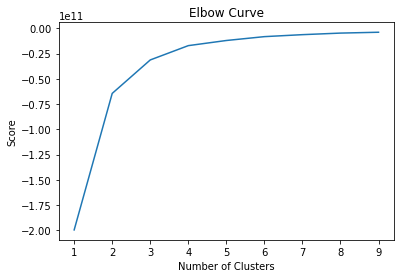

In [60]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Employ k-means clustering

In [61]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [62]:
# Fit the k-means object to the data.

kmeans.fit(df_merged)

/Users/elvachen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [63]:
df_merged['clusters'] = kmeans.fit_predict(df_merged)

/Users/elvachen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [64]:
df_merged.head()

,Unnamed: 0,year,zev_pop,non_zev_pop,zev_sales,gasoline_price,diesel_price,population,clusters
0,0,2010,20.0,885.402,13,3.090846,3.157423,1512.986,0
1,1,2010,1.0,30.480,1,3.090846,3.157423,37.886,0
2,2,2010,10.0,666.294,9,3.090846,3.157423,1052.540,0
3,3,2010,2.0,481.145,2,3.090846,3.157423,932.039,0
4,4,2010,2.0,90.949,1,3.090846,3.157423,135.009,0


In [65]:
df_merged['clusters'].value_counts()

0    599
2     26
1      4
Name: clusters, dtype: int64

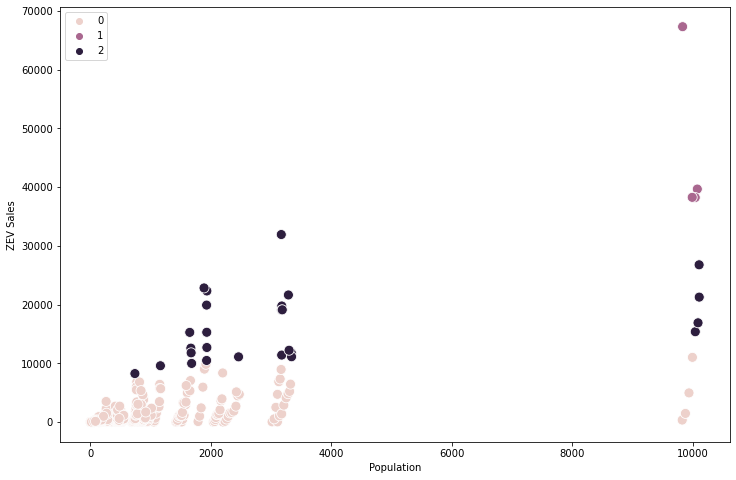

In [66]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_merged['population'], y=df_merged['zev_sales'], hue=kmeans.labels_, s=100) 
# Here, subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population') # Label x-axis.
plt.ylabel('ZEV Sales') # Label y-axis.
plt.show()

Summary of the scatterplots:

According to the above scatterplot, there is a big gap in the middle of the population axis due to a few huge populated counties. The dark purple dots only locte on the very right of the plot, it makes sense to interpret high ZEV sales appears in the high population counties. 
However, the middle purple and pink dots don't interpret very well. Pink dots represent low sales of ZEV, but locate on all population scale. Middle purple dots represent middle sales of ZEV, while dots locate from low population to highesat population. 
Hence, I will say the clustering analysis can not interpret the relationship between ZEV sales and population.

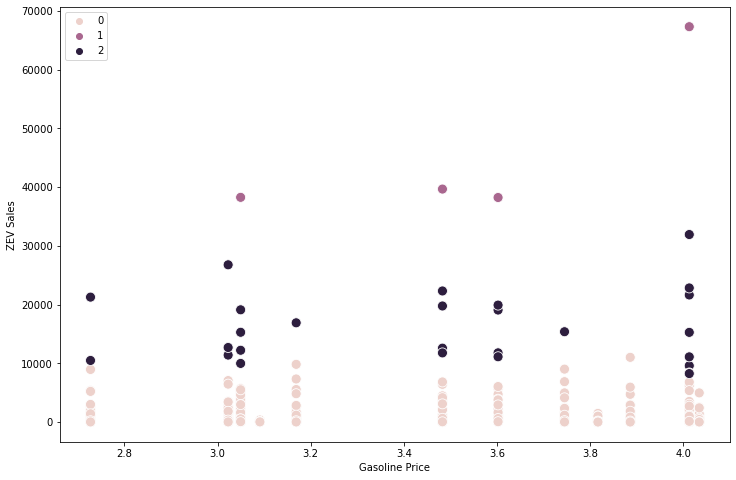

In [74]:
# Plot the clusters for the "gasoline_price" and "zev_sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_merged['gasoline_price'], y=df_merged['zev_sales'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Gasoline Price') 
plt.ylabel('ZEV Sales') 
plt.show()

Summary of the scatterplots:

On this scatterplot, it represents the relationship between gasoline price and ZEV sales. In previous corelation analysis, we already knew there is no significant relationship between these two variables. On this plot, we can also have the same conclusion, the clustering analysis can not interpret the dataset well.

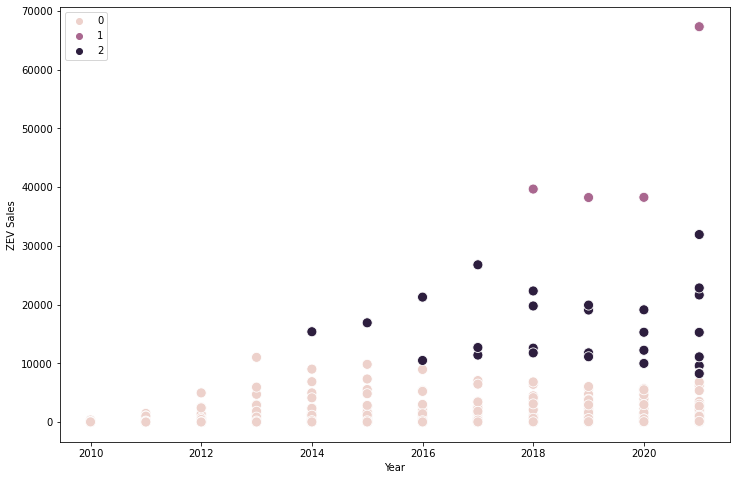

In [73]:
# Plot the clusters for the "gasoline_price" and "zev_sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_merged['year'], y=df_merged['zev_sales'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('ZEV Sales') 
plt.show()

Summary of the scatterplots:

Finally, this plot shows the relationship between year and ZEV sales. As the dataset inclueds data for 11 years, we can see clearly the ZEV sales increased over time. Also, high sales of ZEV appears in the most recent a few year. It matches the ZEV industry development history.

In [68]:
# Change the values of "clusters" column to the tree color labels
df_merged.loc[df_merged['clusters'] == 2, 'cluster'] = 'dark purple'
df_merged.loc[df_merged['clusters'] == 1, 'cluster'] = 'purple'
df_merged.loc[df_merged['clusters'] == 0, 'cluster'] = 'pink'

In [69]:
# Check statistical information of "cluster" 
df_merged.groupby('cluster').agg({'zev_pop':['mean', 'median'], 
                         'zev_sales':['mean', 'median'], 
                         'non_zev_pop':['mean', 'median'],
                        'population':['mean', 'median'],
                          'gasoline_price':['mean', 'median']})

zev_pop              zev_sales           non_zev_pop  \
                      mean    median         mean   median         mean   
cluster                                                                   
dark purple   53642.384615   48700.5  16165.00000  15272.5  2387.866192   
pink           2232.460768     235.0    735.48581     88.0   346.294386   
purple       153054.750000  146672.5  45855.25000  38953.0  6802.879750   

                        population            gasoline_price            
               median         mean     median           mean    median  
cluster                                                                 
dark purple  2050.774  3539.601423   2813.102       3.463912  3.482736  
pink          140.217   547.021282    192.843       3.479379  3.602135  
purple       6833.423  9982.930500  10014.136       3.536742  3.542435

Conclusion:

According to above plots and stats information, we know the clustering analysis can't interpret the dataset perfectly. However, from the first and third scatterplots, we know that ZEV sales has positive relationship with population and time series. We can further analyze in time series.